In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
plt.style.use('bmh')

In [101]:
target_var = 'income'

In [102]:
data = pd.read_csv('adult.csv')  
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [103]:
import pandas as pd

# 讀取 CSV 文件
file_path = 'adult.csv'
df = pd.read_csv(file_path)

# 查看數據的基本信息
df_info = df.info()

# 顯示前幾行數據
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


(None,
    age workclass  fnlwgt     education  education.num marital.status  \
 0   90         ?   77053       HS-grad              9        Widowed   
 1   82   Private  132870       HS-grad              9        Widowed   
 2   66         ?  186061  Some-college             10        Widowed   
 3   54   Private  140359       7th-8th              4       Divorced   
 4   41   Private  264663  Some-college             10      Separated   
 
           occupation   relationship   race     sex  capital.gain  \
 0                  ?  Not-in-family  White  Female             0   
 1    Exec-managerial  Not-in-family  White  Female             0   
 2                  ?      Unmarried  Black  Female             0   
 3  Machine-op-inspct      Unmarried  White  Female             0   
 4     Prof-specialty      Own-child  White  Female             0   
 
    capital.loss  hours.per.week native.country income  
 0          4356              40  United-States  <=50K  
 1          4356       

C:\Users\yuchu\AppData\Local\Temp\ipykernel_16572\1581912025.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


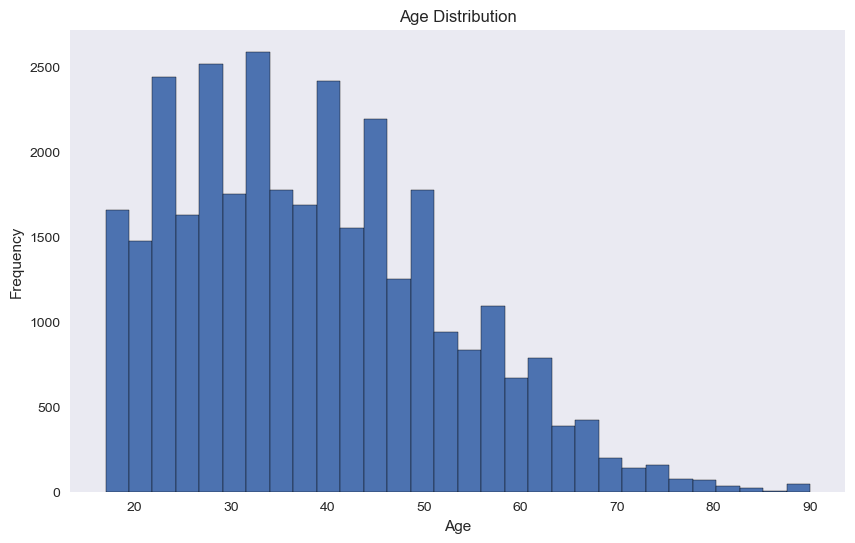

In [104]:
import matplotlib.pyplot as plt

# 設置圖表風格
plt.style.use('seaborn')

# 年齡分佈直方圖
plt.figure(figsize=(10, 6))
df['age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()



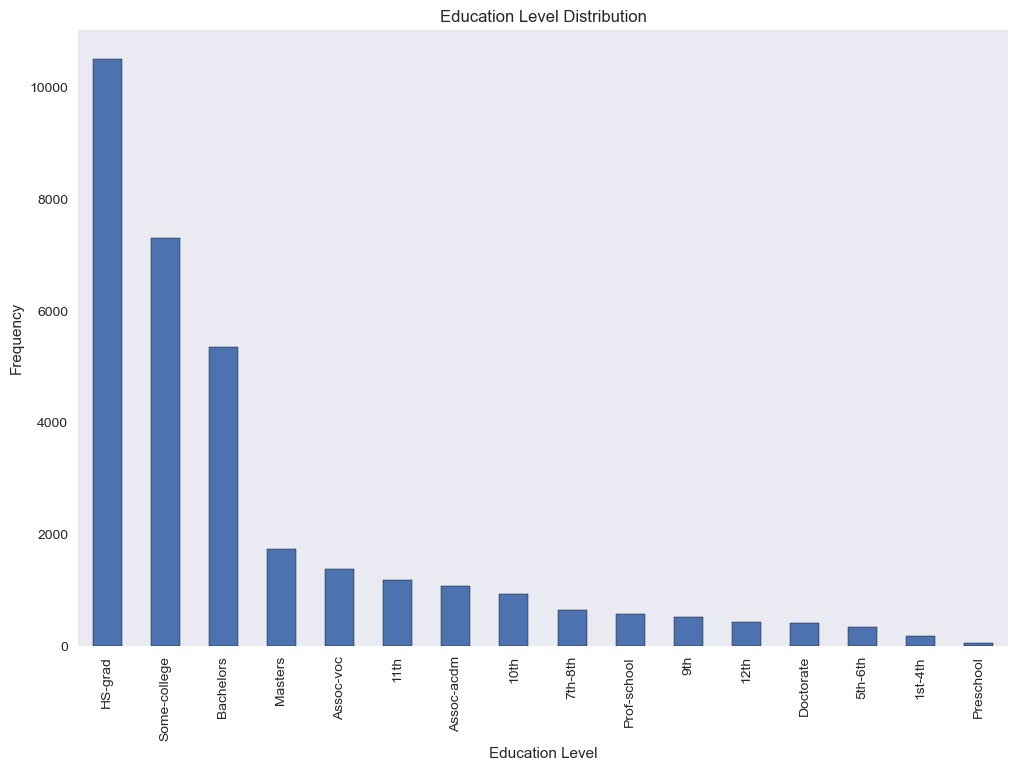

In [105]:
# 教育程度分佈條形圖
plt.figure(figsize=(12, 8))
df['education'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

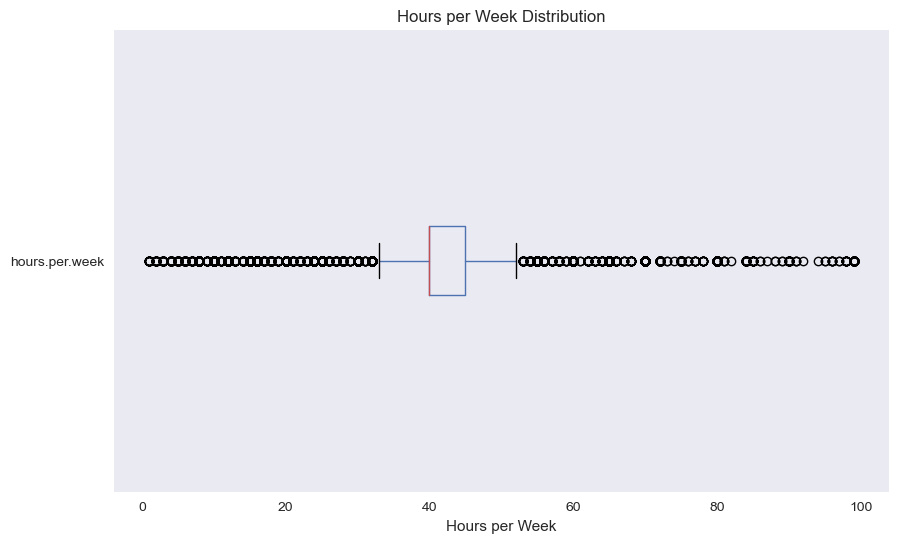

In [106]:
# 每周工作小時數的盒鬚圖
plt.figure(figsize=(10, 6))
df.boxplot(column='hours.per.week', vert=False)
plt.title('Hours per Week Distribution')
plt.xlabel('Hours per Week')
plt.grid(False)
plt.show()

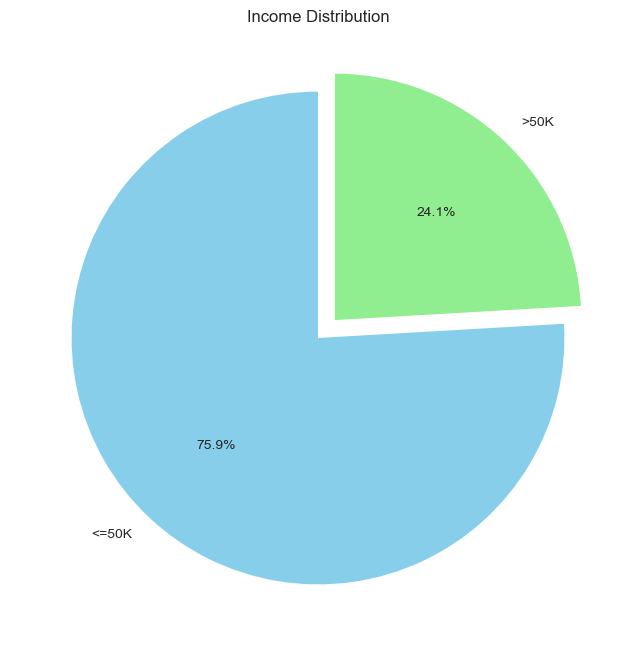

In [107]:
# 收入分佈圓餅圖
plt.figure(figsize=(8, 8))
df['income'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'], explode=[0, 0.1])
plt.title('Income Distribution')
plt.ylabel('')
plt.show()

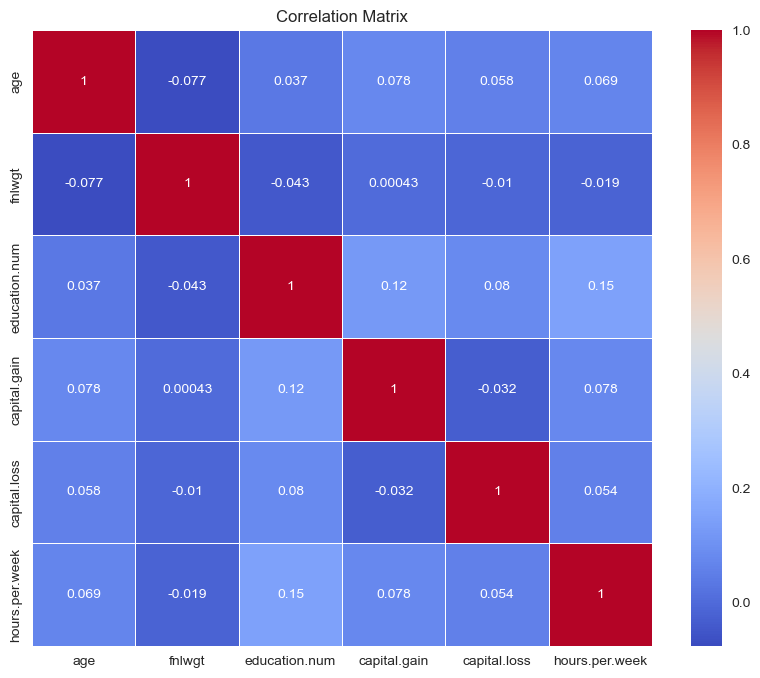

In [108]:
import seaborn as sns

# 計算相關性矩陣
correlation_matrix = df[['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']].corr()

# 繪製相關性熱力圖
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


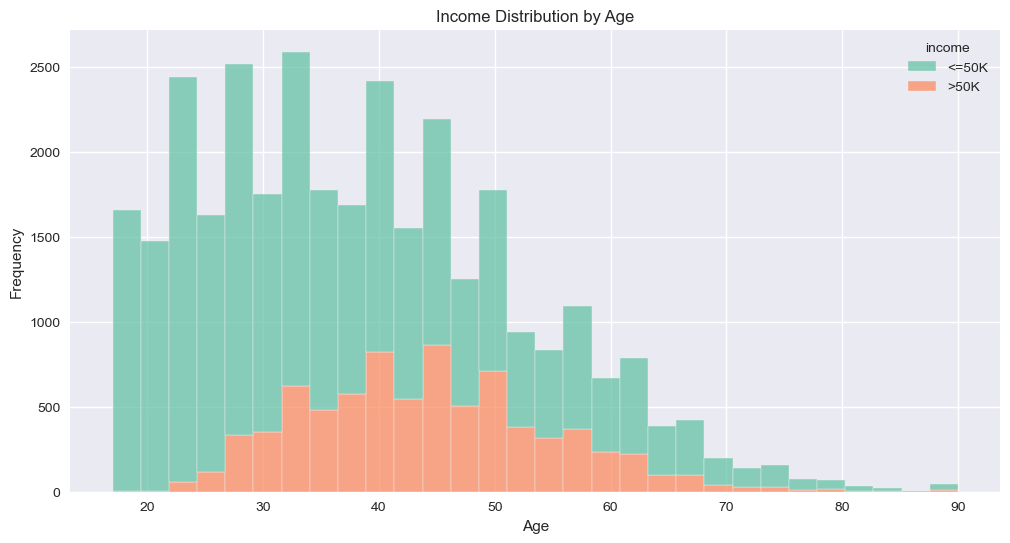

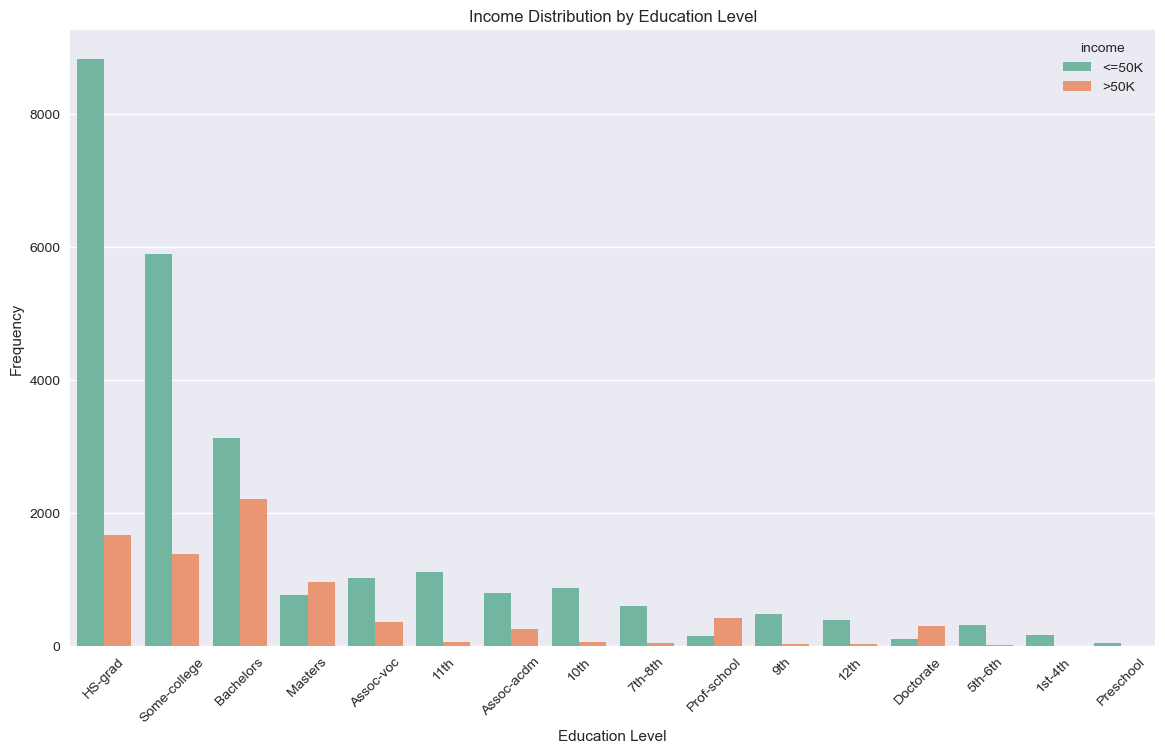

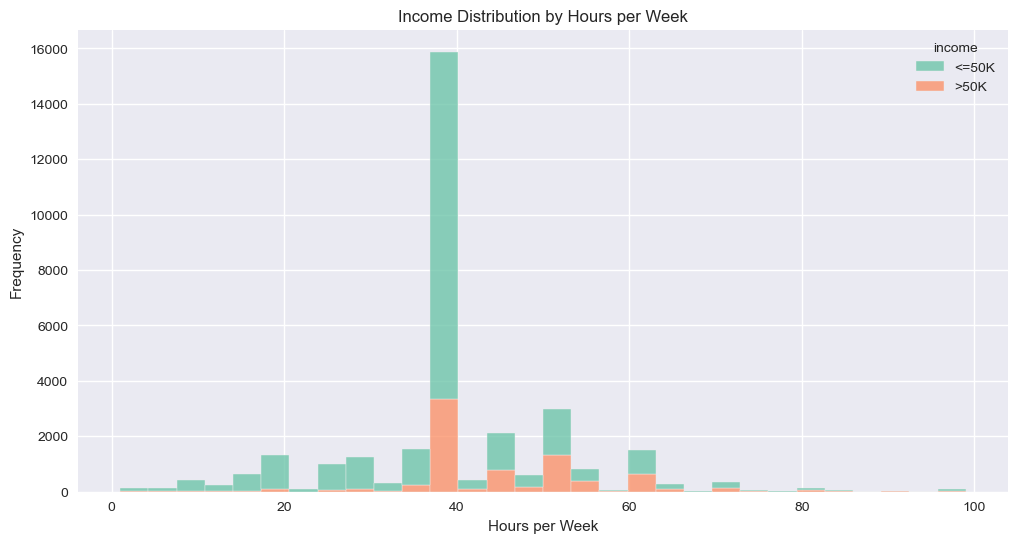

In [109]:
# 將數據按收入進行分組
df['income'] = df['income'].str.strip()
grouped_by_income = df.groupby('income')

# 1. 收入與年齡的關係
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='income', multiple='stack', bins=30, palette='Set2')
plt.title('Income Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. 收入與教育程度的關係
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='education', hue='income', palette='Set2', order=df['education'].value_counts().index)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# 3. 收入與每周工作小時數的關係
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='hours.per.week', hue='income', multiple='stack', bins=30, palette='Set2')
plt.title('Income Distribution by Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()


In [110]:
# 查看缺失值情況
missing_values = df.isnull().sum()

# 處理缺失值（移除包含缺失值的行）
df_cleaned = df.replace(' ?', pd.NA).dropna()

# 確認缺失值已被移除
missing_values_after_cleaning = df_cleaned.isnull().sum()

missing_values, missing_values_after_cleaning


(age               0
 workclass         0
 fnlwgt            0
 education         0
 education.num     0
 marital.status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital.gain      0
 capital.loss      0
 hours.per.week    0
 native.country    0
 income            0
 dtype: int64,
 age               0
 workclass         0
 fnlwgt            0
 education         0
 education.num     0
 marital.status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital.gain      0
 capital.loss      0
 hours.per.week    0
 native.country    0
 income            0
 dtype: int64)

In [111]:
df_cleaned = df.replace('?', pd.NA).dropna()
df_cleaned = df_cleaned.applymap(lambda x: x.strip() if isinstance(x, str) else x)

df_cleaned

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [117]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 編碼分類變量
df_encoded = pd.get_dummies(df_cleaned, columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country'], drop_first=True)

# 分離特徵和目標變量
X = df_encoded.drop('income', axis=1)
y = df_encoded['income'].apply(lambda x: 1 if x == '>50K' else 0)

# 特徵縮放
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 拆分數據集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,132870,9,0,4356,18,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,3900,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,10,0,3900,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
5,34,216864,9,0,3770,45,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
6,38,150601,6,0,3770,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,27,257302,12,0,0,38,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,40,154374,9,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,58,151910,9,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [113]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
# 訓練和評估模型
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(random_state=42)
}

accuracies = {}
confusion_matrices = {}
roc_curves = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracies[name] = accuracy_score(y_test, y_pred)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_curves[name] = (fpr, tpr, auc(fpr, tpr))
    
    print(f"{name} Accuracy: {accuracies[name]}")
    print(f"{name} Confusion Matrix:\n{confusion_matrices[name]}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}\n")


Random Forest Accuracy: 0.8423669816011934
Random Forest Confusion Matrix:
[[4170  363]
 [ 588  912]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4533
           1       0.72      0.61      0.66      1500

    accuracy                           0.84      6033
   macro avg       0.80      0.76      0.78      6033
weighted avg       0.84      0.84      0.84      6033


Decision Tree Accuracy: 0.8024200232057019
Decision Tree Confusion Matrix:
[[3899  634]
 [ 558  942]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4533
           1       0.60      0.63      0.61      1500

    accuracy                           0.80      6033
   macro avg       0.74      0.74      0.74      6033
weighted avg       0.81      0.80      0.80      6033


SVM Accuracy: 0.8373943311785181
SVM Confusion Matrix:
[[4205  328

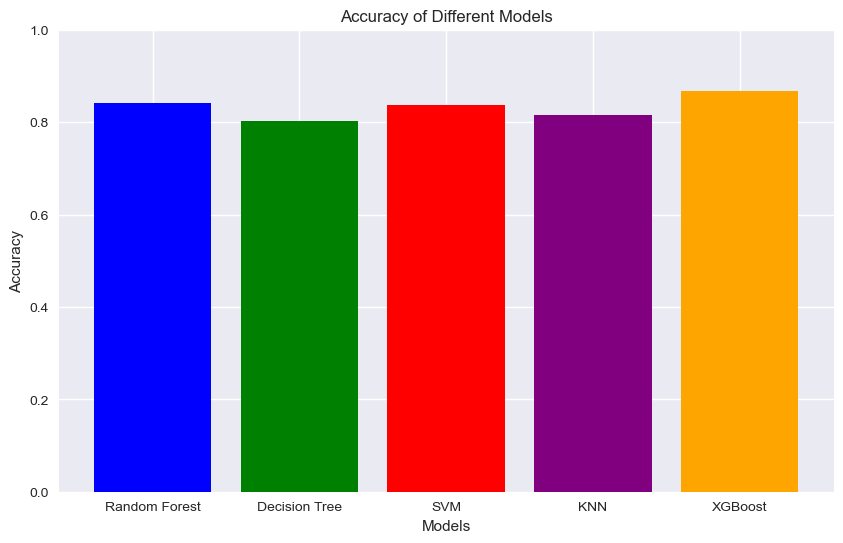

In [114]:

# 繪製精度圖表
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)
plt.savefig('model_accuracies.png')
plt.show()


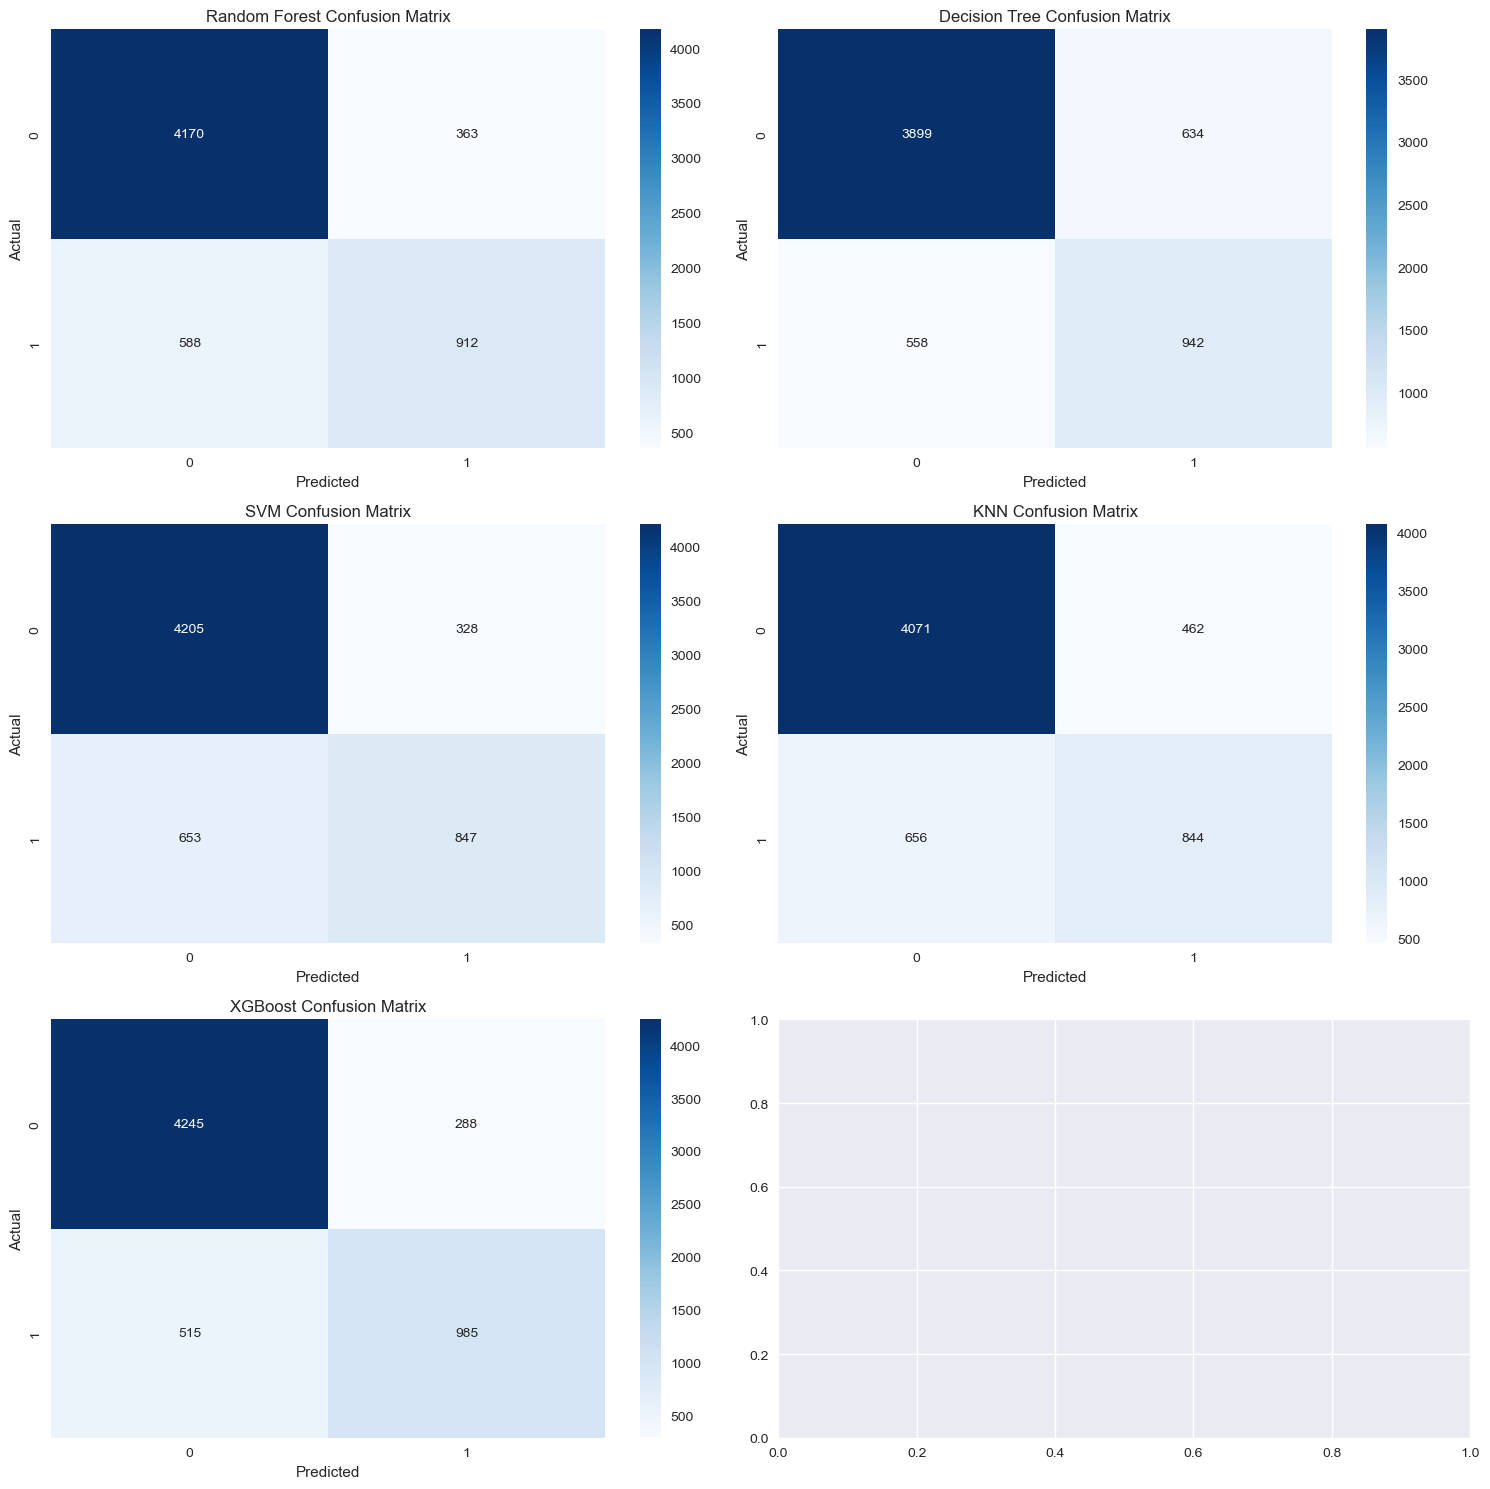

In [115]:

# 繪製混淆矩陣
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.ravel()

for i, (name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.show()


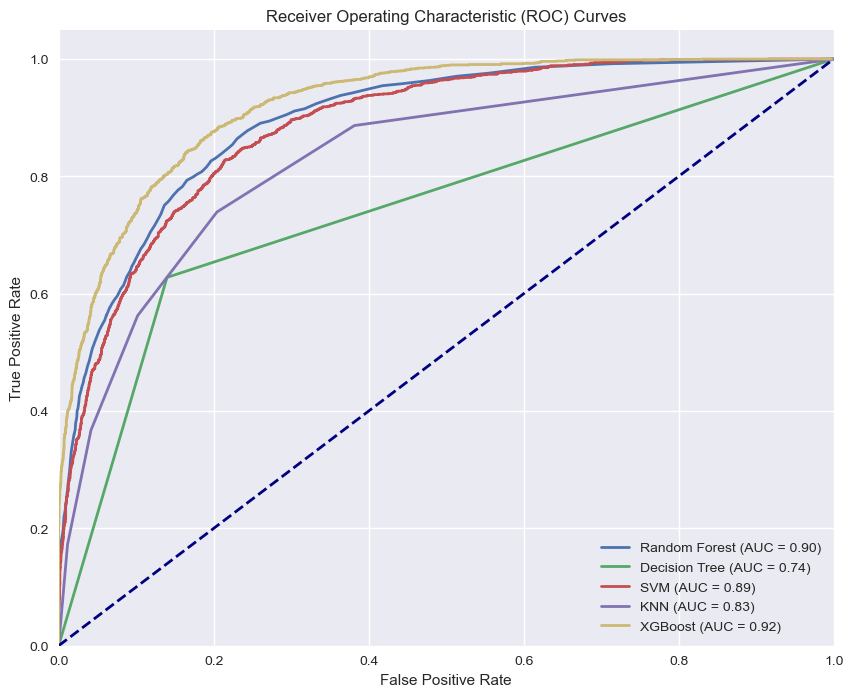

In [116]:

# 繪製 ROC 曲線
plt.figure(figsize=(10, 8))

for name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.savefig('roc_curves.png')
plt.show()
